In [1]:
import logging
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pykeen
from pykeen.kge_models import Region

In [2]:
%matplotlib inline

In [3]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('pykeen').setLevel(logging.INFO)

In [4]:
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


In [5]:
print(time.asctime())

Mon Apr 15 08:34:05 2019


In [6]:
print(pykeen.get_version())

0.0.26-dev


Check which hyper-parameters are required by TransE:

In [7]:
Region.hyper_params

['embedding_dim',
 'margin_loss',
 'learning_rate',
 'scoring_function',
 'normalization_of_entities',
 'init_radius']

Define output directory:

In [8]:
output_directory = 'D:/uni/master/models/region_100epochs/'

In [9]:
train_path = [
    'D:/uni/master/data/YAGO39K/Train/triple2id.tsv',
    'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv',
    'D:/uni/master/data/YAGO39K/Train/subClassOf2id.tsv'
]
test_path =  [
    'D:/uni/master/data/YAGO39K/Test/triple2id_positive.tsv',
    'D:/uni/master/data/YAGO39K/Test/instanceOf2id_positive.tsv',
    'D:/uni/master/data/YAGO39K/Test/subClassOf2id_positive.tsv'
]

Define hyper-parameters inclduing the evaluation information:
 * If no test set is available define the ration of the training set that should be used as test set: **test_set_ratio**
 * Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

Train and evaluate TransE (provide test set):
* Define the path to our test set: **test_set_path**
* Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

In [10]:
config = dict(
    training_set_path           = train_path,
    test_set_path               = test_path,
    execution_mode              = 'Training_mode',
    random_seed                 = 2,
    kg_embedding_model_name     = 'Region',
    embedding_dim               = 100,
    scoring_function            = 1,  # corresponds to L1 
    normalization_of_entities   = 2,  # corresponds to L2
    init_radius                 = 1,
    reg_lambda                  = 1,
    margin_loss                 = 0,
    learning_rate               = 0.1,
    num_epochs                  = 300,  
    batch_size                  = 1024,
    test_batch_size             = 10000,
    filter_negative_triples     = True,
    preferred_device            = 'gpu'
)

Train and evaluate TransE:

In [11]:
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

{'training_set_path': ['D:/uni/master/data/YAGO39K/Train/triple2id.tsv', 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'D:/uni/master/data/YAGO39K/Train/subClassOf2id.tsv'], 'test_set_path': ['D:/uni/master/data/YAGO39K/Test/triple2id_positive.tsv', 'D:/uni/master/data/YAGO39K/Test/instanceOf2id_positive.tsv', 'D:/uni/master/data/YAGO39K/Test/subClassOf2id_positive.tsv'], 'execution_mode': 'Training_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 100, 'scoring_function': 1, 'normalization_of_entities': 2, 'init_radius': 1, 'reg_lambda': 1, 'margin_loss': 0, 'learning_rate': 0.1, 'num_epochs': 300, 'batch_size': 1024, 'test_batch_size': 10000, 'filter_negative_triples': True, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46093, 'num_relations': 39}


INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
Training epoch: 100%|█████████████████████████████████████| 300/300 [3:26:56<00:00, 41.39s/it]
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
100%|█████████████████████████████████████████████████| 15364/15364 [4:18:10<00:00,  1.02s/it]
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 15495.13s seconds


Check result entries:

In [12]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'entity_to_embedding', 'relation_to_embedding', 'eval_summary', 'entity_to_id', 'relation_to_id', 'final_configuration'])

Visualize loss values:

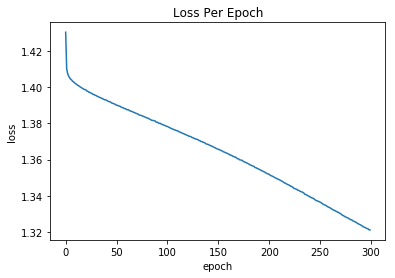

In [13]:
losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

Get evaluation results:
 * Mean rank
 * Hits@k, k $\in$ {1,3,5,10} 

In [14]:
results.results['eval_summary']

{'mean_rank': 0.28826892050317704, 'hits@k': {1: 1.0, 3: 1.0, 5: 1.0, 10: 1.0}}

Load and evaluate

In [ ]:
import json
import pykeen
import torch
import pickle as pkl

In [3]:
results = json.load(open('D:/uni/master/models/region_100epochs/evaluation_summary.json'))

In [5]:
results['hits@k']['1']

1.0

In [ ]:
model = pkl

## Results:

    config = dict(
        training_set_path           = train_path,
        test_set_path               = test_path,
        execution_mode              = 'Training_mode',
        random_seed                 = 2,
        kg_embedding_model_name     = 'Region',
        embedding_dim               = 100,
        scoring_function            = 1,  # corresponds to L1 
        normalization_of_entities   = 2,  # corresponds to L2
        init_radius                 = 1,
        reg_lambda                  = 2,
        margin_loss                 = 0,
        learning_rate               = 0.1,
        num_epochs                  = 100,  
        batch_size                  = 1024,
        filter_negative_triples     = True,
        preferred_device            = 'gpu'
    )

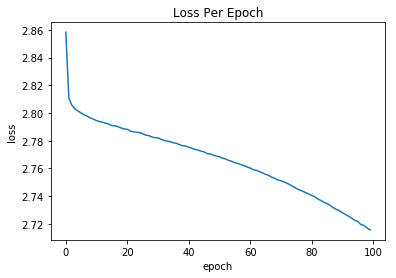

In [21]:
losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [22]:
results.results['eval_summary']

{'mean_rank': 12258.63, 'hits@k': {1: 0.01, 3: 0.02, 5: 0.02, 10: 0.02}}